# Exercise 3, task 1 - Vector fields, orbits and visualizations

Let us define the function that would compute the vector field for a given pair (x, alpha).

In [38]:
import numpy as np

def compute_vector_field(x, alpha):
    """
    Computes vector field for a given pair (x, alpha)
    :param x: vector x, a numpy array of dimension 2
    :param alpha: vector field parameter, float
    """
    assert type(x) == type(np.array([])) and x.size == 2, "Faulty x argument! Please provide a 2-dim numpy array"
    assert type(alpha) == float, "Faulty alpha argument. Please provide a float"
    
    matrix = np.array([alpha, alpha, -0.25, 0.0]).reshape(2, -1)
    return matrix @ x

In [39]:
compute_vector_field(np.array([1,2]), 0.1)

array([ 0.3 , -0.25])

That seems to work just fine. Let's now get down to plotting. Let's begin with the phase portraits.
Having read a bit the streamplot documentation, I realized that we are probably going to need to change our approach to computing the vector fields if we wish to visualize it. Let's take a look at this:

In [40]:
def compute_x_coordinates(X, Y, alpha):
    return X*alpha + Y*alpha

def compute_y_coordinates(X, Y, alpha):
    return X*(-0.25)    

Now we can construct the parameters for streamplot visualization.

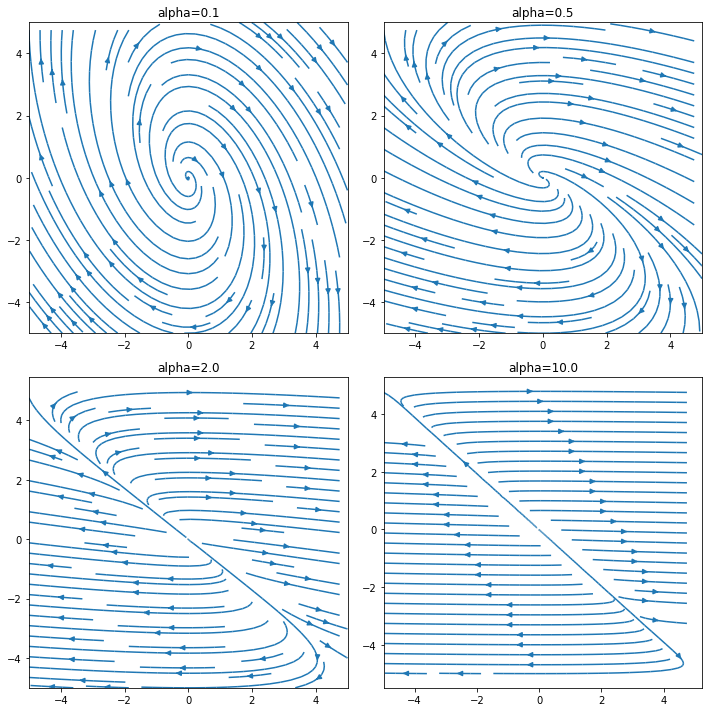

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def return_streamplot_params(alpha, gridrange):
    # define a grid for visualization
    Y, X = np.mgrid[-GRIDRANGE:GRIDRANGE:100j, -GRIDRANGE:GRIDRANGE:100j]

    # define and fill out grid values using the function created above
    X_vals = compute_x_coordinates(X, Y, alpha)
    Y_vals = compute_y_coordinates(X, Y, alpha)
    
    return X, Y, X_vals, Y_vals

# visualize streamplots
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1])

# build plots for different alphas

X, Y, X_vals, Y_vals = return_streamplot_params(0.1, 3)
ax0 = fig.add_subplot(gs[0,0])
ax0.streamplot(X, Y, X_vals, Y_vals)
ax0.set_title('alpha=0.1')

X, Y, X_vals, Y_vals = return_streamplot_params(0.5, 3)
ax0 = fig.add_subplot(gs[0,1])
ax0.streamplot(X, Y, X_vals, Y_vals)
ax0.set_title('alpha=0.5')

X, Y, X_vals, Y_vals = return_streamplot_params(2.0, 3)
ax0 = fig.add_subplot(gs[1,0])
ax0.streamplot(X, Y, X_vals, Y_vals)
ax0.set_title('alpha=2.0')

X, Y, X_vals, Y_vals = return_streamplot_params(10.0, 3)
ax0 = fig.add_subplot(gs[1,1])
ax0.streamplot(X, Y, X_vals, Y_vals)
ax0.set_title('alpha=10.0')

plt.tight_layout()
plt.show()

These look really nice. And they correspond well with the plots provided in the exercise sheet.
Are these systems topologically equivalent? Let us find the equations for their orbits (trajectories):
$$\begin{cases} \dot{x_1} = \alpha x_1 + \alpha x_2 \\ \dot{x_2} = -0.25x_1\end{cases}$$
In order to solve this system of differential equations, we can apply the method of characteristical equations (a.k.a. Euler's method). The solutions of the characteristical equations for $x_2$ will be:
$$ \lambda_{1,2} = \frac{-\alpha \pm \sqrt{\alpha^2 - \alpha}}{2}$$
and the corresponding solution:
$$x_2 = C_1e^{\lambda_1t} + C2e^{\lambda_2t}$$
Bearing in mind that $\dot{x_2} = -0.25x_1$, we get
$$x_1 = -4(\lambda_1C_1e^{\lambda_1t} + \lambda_2C_2e^{\lambda_2t})$$,
bringing us to the equations for the orbits:
$$\begin{cases} x_1 = -4(\lambda_1C_1e^{\lambda_1t} + \lambda_2C_2e^{\lambda_2t}) \\ x_2 = C_1e^{\lambda_1t} + C_2e^{\lambda_2t}\end{cases}$$,
where the constants may be defined from the initial conditions. (0,0) is obviously an equilibrium.
We can immediately notice that there is a principle difference between cases where $\alpha > 1$, $\alpha = 1$ and $\alpha < 1$, as the solution for $x_2$ will be respectively of trigonometrial, exponential polynome or just exponential. Let's see what happens if $\alpha = 1$.

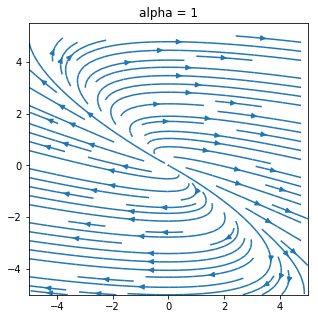

In [42]:
fig2 = plt.figure(figsize=(5,5))
X, Y, X_vals, Y_vals = return_streamplot_params(1, 3)
plt.streamplot(X, Y, X_vals, Y_vals)
plt.title("alpha = 1")
plt.show()

Actually, pretty similar to $\alpha=2$ and $\alpha=10$. 
Let's make a brief summary. 


$$\alpha < 1:\begin{cases} x_1 = -4(\lambda_1C_1e^{\lambda_1t} + \lambda_2C_2e^{\lambda_2t}) \\ x_2 = C_1e^{\lambda_1t} + C_2e^{\lambda_2t}\end{cases}$$

$$\alpha = 1:\begin{cases} x_1 = -4(C_1 - C_1\frac{t}{2} - \frac{C_2}{2})e^{-\frac{t}{2}} \\ x_2 = (C_1t + C_2)e^{-t/2} \end{cases}$$

$$\alpha > 1:\begin{cases} x_1 = -4(C_2\lambda_2cos(\lambda_2t) - C_1\lambda_1sin(\lambda_1t)) \\ x_2 = C_1cos(\lambda_1t) + C_2sin(\lambda_2t) \end{cases}$$
Everywhere, 
$$ \lambda_{1,2} = \frac{-\alpha \pm \sqrt{\alpha^2 - \alpha}}{2}$$

# Exercise 3, task 2 - Common bifurcations in non-linear systems 

Let's write some useful functions

In [62]:
def system_u(x, alpha):
    """
    computes system's vector field in point x for a given alpha
    """
    return alpha - x**2

def system_u2(x, alpha):
    """
    same thing, but for the second equation from the task
    """
    return alpha - 2*x**2 - 2

As shown in lectures, we will plot the the connection between $x_0$ and the value of the parameter. First, we have this equation: 
$$ \dot{x} = \alpha - x^2$$
So, for $x = \pm\sqrt{\alpha}$ our object will be stable (if $\alpha$ is positive). For negative values of the parameter, no stable states for us. 
From the lecture we know that this is called a "Saddle-node" bifurcation. 

Let us first try to get the phase portraits we saw.

<Figure size 432x288 with 0 Axes>

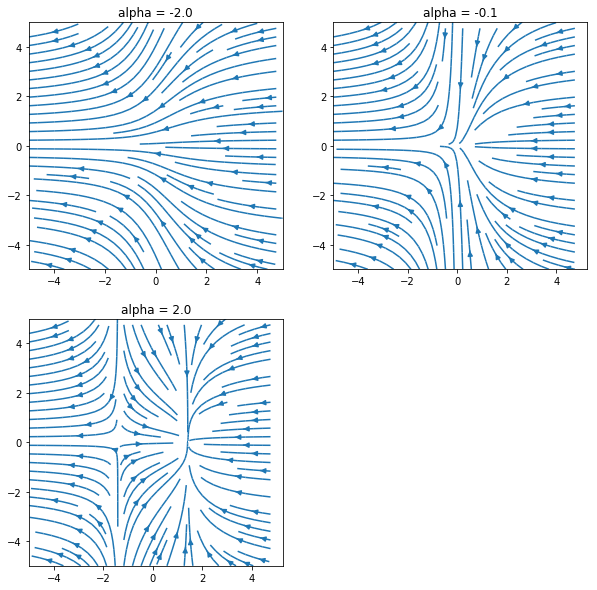

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def compute_x_task2(X, Y, alpha):
    return alpha-X**2

def compute_y_task2(X, Y, alpha):
    return -Y


def return_streamplot_params_task2(alpha, gridrange):
    # define a grid for visualization
    Y, X = np.mgrid[-GRIDRANGE:GRIDRANGE:100j, -GRIDRANGE:GRIDRANGE:100j]

    # define and fill out grid values using the function created above
    X_vals = compute_x_task2(X, Y, alpha)
    Y_vals = compute_y_task2(X, Y, alpha)
    
    return X, Y, X_vals, Y_vals


plt.clf()
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1])
alphas = [-2.0, -0.1, 2.0]
for alpha in alphas:
    ax0 = fig.add_subplot(gs[int(alphas.index(alpha)/2), alphas.index(alpha)%2])
    X, Y, X_vals, Y_vals = return_streamplot_params_task2(alpha, 1)
    ax0.streamplot(X, Y, X_vals, Y_vals)
    ax0.set_title("alpha = " + str(alpha))
plt.show()

Looks good. Now, let's move on to the bifurcation diagrams. 

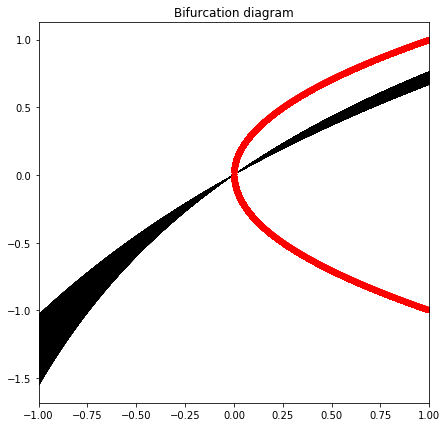

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# define some control variables
n_steps = 10000
alphas = np.linspace(-1,1, n_steps)

# we will use 100 iterations of the given function and use the last 100 to display the bifurcation map
iterations = 1000
last = 200
# initialize initial condition
deltaT = 0.001
x = 1e-5*np.ones(n_steps)
# visualize
fig = plt.figure(figsize=(7,7))

for i in range(iterations):
    x = x + deltaT*system_u(x, alphas)
    if iterations - last < i:
        plt.plot(alphas, x, ",k", alpha=0.25)
        

alphasPOS = np.linspace(0, 1, n_steps/2)
alphasNEG = np.linspace(-1, 0, n_steps/2)

plt.plot(alphasPOS, np.sqrt(alphasPOS), "*r")
plt.plot(alphasPOS, -np.sqrt(alphasPOS), "*r")
plt.xlim((-1,1))
plt.title("Bifurcation diagram")
plt.show()

To determine whether the systems are topologically equivalent, let us write down the equations for their orbits. First, system (6):
$$\dot{x_1} = \alpha - x^2 \rightarrow$$

$$\frac{dx}{\alpha-x^2} = dt $$
First, let $\alpha > 0$. Then, we have 
$$ \int_{x_o}^{x(t)}\frac{dx}{\alpha-x^2} = \int_{t_o}^{t}dt \rightarrow $$

$$ \frac{1}{2\sqrt{\alpha}}ln(\frac{\sqrt{\alpha}+x}{\sqrt{\alpha}-x}) |^{x(t)}_{x_o} = (t-t_o) $$
Let us consider $t_o = 0$ and set $\frac{1}{2\sqrt{\alpha}}ln(\frac{\sqrt{\alpha}+x_o}{\sqrt{\alpha}-x_o}) = C$ - a constant depending on the initial position. In that case, after some math sit-ups we get the following equation:
$$ x(t) = \frac{C\sqrt{\alpha}e^{2t\sqrt{\alpha}}-\alpha}{1-Ce^{2t\sqrt{\alpha}}} \ \ \ \ \ \ (6.1)$$
Now, let us consider $\alpha=0$. Then the we get:
$$ \dot{x} = -x^2 \rightarrow -\frac{dx}{x^2} = dt$$
and thus
$$ x(t) = \frac{x_o}{tx_o + 1} \ \ \ \ \ \ (6.2) $$
Finally, if $\alpha < 0$, we note $\beta = |\alpha|$ and get a differential equation of this kind:
$$ \dot{x} = -\beta - x^2, \beta > 0 \rightarrow -\frac{dx}{\beta + x^2} = dt $$
We can re-write it like this:
$$ \frac{1}{\beta}(-\frac{dx}{1+(x/\sqrt{\beta})^2}) = dt $$
And this solution for this is known:
$$ arcctg(\frac{x}{\sqrt{\beta}}) |^{x(t)}_{x_o} = t\beta \rightarrow$$
$$ x(t) = \sqrt{-\alpha} * ctg(-\alpha t + arcctg(x_o/\sqrt{-\alpha}))  \ \ \ \ \ \ (6.3) $$
So, (6.1), (6.2) and (6.3) give us the trajectories depending on the sign of the parameter. Let's sum up:
$$ x(t) = \begin{cases} \frac{C\sqrt{\alpha}e^{2t\sqrt{\alpha}}-\alpha}{1-Ce^{2t\sqrt{\alpha}}}, \ \  \alpha > 0 \\ \frac{x_o}{tx_o + 1}, \ \  \alpha = 0 \\ \sqrt{-\alpha} * ctg(-\alpha t + arcctg(x_o/\sqrt{-\alpha})),  \ \ \alpha < 0\end{cases} $$
What about our second equation, $\dot{x} = \alpha - 2x^2 - 2$? Let's make some adjustments:
$$ (1) \ \ \  y = \sqrt{2}x \rightarrow dy = \sqrt{2}dx \rightarrow \frac{dy}{\sqrt{2}(\alpha - y^2 - 2)} = dt$$
$$ (2) \ \ \ \beta = \alpha - 2 \rightarrow \frac{dy}{\beta - y^2} = \sqrt{2}dt $$
So basically we are facing the same problem, except the coordinate system has different scale and the "important" parameter values are shifted by 2 (the "interesting point used to be 0, now it is 2).